In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
from mist_cf import common
from mist_cf.common.plot_utils import *
set_style()

/home/samlg/.conda/envs/ms-gen/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
fig_folder = Path("../results/figures/")
fig_folder = fig_folder / "max_subpeak"
fig_folder.mkdir(parents=True, exist_ok=True)
# mdkir
fig_folder.mkdir(parents=True, exist_ok=True)
data_folder = Path("../data/nist_canopus/")
# rdbe_labels_file = data_folder / "decoy_labels/decoy_label_RDBE.tsv"
labels_file = data_folder / "labels.tsv"
labels = pd.read_csv(labels_file, sep="\t")

## Benchmark

In [16]:
res_folders = {
                "mist_cf_ms2": ["../results/mist_cf_nist_max_subpeak/"],
               }

In [17]:
dict_list = [{"model": model_name, "folder": f} 
             for model_name, folder_list in res_folders.items() 
             for f in folder_list]

In [18]:
all_dfs = []
for entry in dict_list:
    folder = Path(entry["folder"])
    model = entry['model']
    # load results
    res_files = folder.rglob("full_out.tsv")
    for res_file in res_files:
        split = res_file.parent.parent.parent.name
        df = pd.read_csv(res_file, sep="\t")
        df['split'] = split
        df['model'] = model
        all_dfs.append(df)
all_df = pd.concat(all_dfs, ignore_index=True)
split_to_subpeak = lambda x: int(x.split("_")[-2])
all_df['subpeaks']  = all_df['split'].apply(split_to_subpeak)

In [19]:
all_df.groupby(["model", "split",]).mean()

ind_found  ind_found_adduct  \
model       split                                           
mist_cf_ms2 max_subpeak_10_1   1.971882          1.213152   
            max_subpeak_15_1   2.008617          1.221315   
            max_subpeak_1_1    2.899773          1.258957   
            max_subpeak_20_1   2.009070          1.230385   
            max_subpeak_30_1   1.915646          1.214512   
            max_subpeak_3_1    2.490703          1.234467   
            max_subpeak_50_1   1.955102          1.205442   
            max_subpeak_5_1    2.277551          1.227664   

                              ind_found_full_form        mass  Top 1 acc.  \
model       split                                                           
mist_cf_ms2 max_subpeak_10_1             1.595011  409.918713    0.754195   
            max_subpeak_15_1             1.599093  409.918713    0.758277   
            max_subpeak_1_1              2.115646  409.918713    0.673016   
            max_subpeak_20_1             1.631746  409.918713    0.755556   
            max_subpeak_30_1             1.536961  409.918713    0.761451   
            max_subpeak_3_1              1.911565  409.918713    0.719274   
            max_subpeak_50_1             1.579138  409.918713    0.774150   
            max_subpeak_5_1              1.811791  409.918713    0.728798   

                              Top 2 acc.  Top 3 acc.  Top 4 acc.  Top 5 acc.  \
model       split                                                              
mist_cf_ms2 max_subpeak_10_1    0.892971    0.927891    0.941497    0.953741   
            max_subpeak_15_1    0.891610    0.920635    0.938322    0.951927   
            max_subpeak_1_1     0.814966    0.864853    0.897052    0.915193   
            max_subpeak_20_1    0.886168    0.920635    0.943311    0.954195   
            max_subpeak_30_1    0.898413    0.933787    0.949660    0.958730   
            max_subpeak_3_1     0.859410    0.905215    0.923810    0.937868   
            max_subpeak_50_1    0.893878    0.931066    0.946939    0.956916   
            max_subpeak_5_1     0.858957    0.908390    0.931519    0.941950   

                              Top 6 acc.  ...  Top 20 acc.  Top 50 acc.  \
model       split                         ...                             
mist_cf_ms2 max_subpeak_10_1    0.960998  ...     0.990930     0.998639   
            max_subpeak_15_1    0.960998  ...     0.989569     0.998186   
            max_subpeak_1_1     0.926984  ...     0.978231     0.995465   
            max_subpeak_20_1    0.960998  ...     0.988662     0.998186   
            max_subpeak_30_1    0.965079  ...     0.991383     0.999093   
            max_subpeak_3_1     0.945578  ...     0.984127     0.994558   
            max_subpeak_50_1    0.963265  ...     0.991383     0.997732   
            max_subpeak_5_1     0.952834  ...     0.987755     0.996825   

                              Top 100 acc.  Top 200 acc.  Top 300 acc.  \
model       split                                                        
mist_cf_ms2 max_subpeak_10_1      0.999546      1.000000           1.0   
            max_subpeak_15_1      0.999546      1.000000           1.0   
            max_subpeak_1_1       0.999093      1.000000           1.0   
            max_subpeak_20_1      0.999546      1.000000           1.0   
            max_subpeak_30_1      0.999546      1.000000           1.0   
            max_subpeak_3_1       0.999093      1.000000           1.0   
            max_subpeak_50_1      0.999093      1.000000           1.0   
            max_subpeak_5_1       0.999546      0.999546           1.0   

                              Top 400 acc.  Top 500 acc.  Top 600 acc.  \
model       split                                                        
mist_cf_ms2 max_subpeak_10_1           1.0           1.0           1.0   
            max_subpeak_15_1           1.0           1.0           1.0   
            max_subpeak_1_1            1.0           1.0   

In [20]:
# Build accuracy table
top_k = list(range(1,4))
tbl_df = all_df.copy()


keep_rename_map = {f"Top {k} acc.":k for k in top_k}
keep_keys = list(keep_rename_map.keys())

# Group by split and model and take mean and std
agg_df = tbl_df.groupby(["subpeaks", "split"]).mean()[keep_keys].sort_index().reset_index()

# Reset split from index
mean_df = agg_df.groupby(["subpeaks"]).mean().reset_index().round(3).sort_index()
std_df = agg_df.groupby(["subpeaks"]).std().reset_index().round(3).sort_index().replace(np.nan, 0)

error_df = mean_df.copy()
for k in keep_keys: 
    # str concat mean df and std df
    error_df[k] = [rf"${mean_df[k][i]:.3f} \pm {std_df[k][i]:.3f}$" for i in range(len(mean_df))]

# Melt so keys are "Model" "dataset" and "top k"
error_df = error_df.melt(id_vars=["subpeaks"], var_name="Top k", value_name="Accuracy")
# Pivot so it's a multi index of "Dataset", "Top k, with "Accuracy" as values 
error_df = error_df.pivot(columns=["Top k"], index="subpeaks", values="Accuracy")
error_df.index.name = "Max subpeaks"

# Sort by max subpeaks
error_df = error_df.sort_index(ascending=True)

display(error_df)
latex = error_df.to_latex(caption="MIST-CF with differing maximum subpeaks", 
                        label="tab:subpeaks",
                        escape=False)
print(latex)

Top k,Top 1 acc.,Top 2 acc.,Top 3 acc.
Max subpeaks,,,
1,$0.673 \pm 0.000$,$0.815 \pm 0.000$,$0.865 \pm 0.000$
3,$0.719 \pm 0.000$,$0.859 \pm 0.000$,$0.905 \pm 0.000$
5,$0.729 \pm 0.000$,$0.859 \pm 0.000$,$0.908 \pm 0.000$
10,$0.754 \pm 0.000$,$0.893 \pm 0.000$,$0.928 \pm 0.000$
15,$0.758 \pm 0.000$,$0.892 \pm 0.000$,$0.921 \pm 0.000$
20,$0.756 \pm 0.000$,$0.886 \pm 0.000$,$0.921 \pm 0.000$
30,$0.761 \pm 0.000$,$0.898 \pm 0.000$,$0.934 \pm 0.000$
50,$0.774 \pm 0.000$,$0.894 \pm 0.000$,$0.931 \pm 0.000$


\begin{table}
\centering
\caption{MIST-CF with differing maximum subpeaks}
\label{tab:subpeaks}
\begin{tabular}{llll}
\toprule
Top k &         Top 1 acc. &         Top 2 acc. &         Top 3 acc. \\
Max subpeaks &                    &                    &                    \\
\midrule
1            &  $0.673 \pm 0.000$ &  $0.815 \pm 0.000$ &  $0.865 \pm 0.000$ \\
3            &  $0.719 \pm 0.000$ &  $0.859 \pm 0.000$ &  $0.905 \pm 0.000$ \\
5            &  $0.729 \pm 0.000$ &  $0.859 \pm 0.000$ &  $0.908 \pm 0.000$ \\
10           &  $0.754 \pm 0.000$ &  $0.893 \pm 0.000$ &  $0.928 \pm 0.000$ \\
15           &  $0.758 \pm 0.000$ &  $0.892 \pm 0.000$ &  $0.921 \pm 0.000$ \\
20           &  $0.756 \pm 0.000$ &  $0.886 \pm 0.000$ &  $0.921 \pm 0.000$ \\
30           &  $0.761 \pm 0.000$ &  $0.898 \pm 0.000$ &  $0.934 \pm 0.000$ \\
50           &  $0.774 \pm 0.000$ &  $0.894 \pm 0.000$ &  $0.931 \pm 0.000$ \\
\bottomrule
\end{tabular}
\end{table}



/tmp/ipykernel_404460/2961784014.py:31: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex = error_df.to_latex(caption="MIST-CF with differing maximum subpeaks",


## Line plot of acc

In [58]:
# Group by method, split, and compute top k accuracy through 20
def top_k_accuracy(x, top_k):
    k_dict = []
    for k in range(top_k): 
        acc = np.mean(x['ind_found'] <= k)
        k_dict.append({"k": k, "acc": acc})
    return k_dict

top_k = 20
#top_k_acc = all_df.groupby(["model", "split",]).apply(lambda x: top_k_accuracy(x, top_k))

keys = ["model", "split", "subpeaks"]
out_df = []
for names, sub_df in all_df.groupby(keys):
    update_dict = dict(zip(keys, names))
    sub_dicts = top_k_accuracy(sub_df, top_k)
    out_df.extend([dict(**i, **update_dict) for i in sub_dicts ])
out_df = pd.DataFrame(out_df)

In [59]:
out_df

,k,acc,model,split,subpeaks
0,0,0.000000,mist_cf_ms2,max_subpeak_10_1,10
1,1,0.754195,mist_cf_ms2,max_subpeak_10_1,10
2,2,0.892971,mist_cf_ms2,max_subpeak_10_1,10
3,3,0.927891,mist_cf_ms2,max_subpeak_10_1,10
4,4,0.941497,mist_cf_ms2,max_subpeak_10_1,10
...,...,...,...,...,...
155,15,0.981406,mist_cf_ms2,max_subpeak_5_1,5
156,16,0.981859,mist_cf_ms2,max_subpeak_5_1,5
157,17,0.984127,mist_cf_ms2,max_subpeak_5_1,5
158,18,0.984580,mist_cf_ms2,max_subpeak_5_1,5


In [60]:
mist_cf_color = color_scheme["mist_cf_ms2"]
subpeaks = sorted(out_df['subpeaks'].unique())
subpeaks

max(subpeaks)

pal = sns.light_palette(mist_cf_color, n_colors=max(subpeaks)+1, reverse=False, as_cmap=False, input='rgb')

/home/samlg/.conda/envs/ms-gen/lib/python3.8/site-packages/matplotlib/axes/_base.py:2283: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


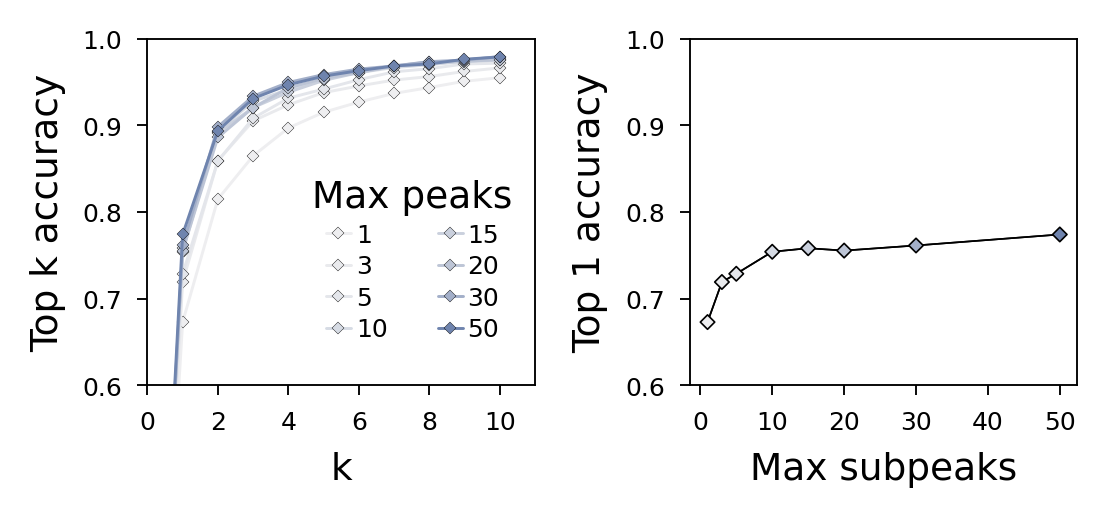

In [62]:
# Here just show the "with nist " result
# Plot out df as a line plot where each line is specific to a model, k is the x acc, and "acc" is the y axis
# Also use the splits to fill in the lines with error/deviation
# Plot the mean of the splits as a line, and the std as a shaded region

figsize = (4,1.5)

# Filter outdf to only include splits with nist 
# Create two subplots
fig, axes = plt.subplots(1,2, figsize=figsize, dpi=300, sharey=False)

# fig = plt.figure(figsize=figsize, dpi=300)
# sns.lineplot(data=out_df, x="k", y="acc", hue="model", ax=ax, ci="sd", err_style="band", 
#              palette="colorblind")
ax = axes[0]
for subpeak in subpeaks:
    subdf = out_df[out_df["subpeaks"] == subpeak]
    mean_df = subdf.groupby("k").mean()
    std_df = subdf.groupby("k").std()
    # Get number of splits
    n_splits = subdf["split"].nunique()
    # Get stderror of mean and 95% conf
    std_err = std_df / np.sqrt(n_splits)
    conf = std_err * 1.96

    # Sort dfs by k 
    mean_df = mean_df.sort_index()[:11]
    conf = conf.sort_index()[:11]
    
    # Plot mean
    ax.plot(mean_df.index, mean_df["acc"], 
            label=f"{subpeak}", 
            color=pal[subpeak], 
            marker=marker_scheme["mist_cf_ms2"],
            markeredgecolor="black",
            markeredgewidth=0.1,
            markersize=2,
            linewidth=0.7
            )

    # Plot conf
    ax.fill_between(mean_df.index,
                    mean_df["acc"] - conf["acc"],
                    mean_df["acc"] + conf["acc"],
                    alpha=0.2,
                    color=pal[subpeak])
    
ax.set_xlabel("k")
ax.set_ylabel("Top k accuracy")
ax.set_ylim(0.6,1)
uplim = 10
ax.set_xlim(0,uplim+1)
ax.set_xticks(np.arange(0, uplim +2, 2))
# ax.set_yscale("log")

# Make legend with no box
ax.legend(bbox_to_anchor=(0.4, 0.36), borderaxespad=0., 
                frameon=False, labelspacing=0.3, handletextpad=0.2,
                handlelength=1, loc="center left", ncol=2, 
                title="Max peaks", # Num cols 2
                
                )#fontsize=6)

# Record ytick labels to apply to second plot
yticks = ax.get_yticks()


ax = axes[1]
# groupby subpeak and get mean and var for each subpeak val at top 1 accuracy
subpeak_df = out_df.groupby(["subpeaks", "k"]).mean().reset_index()
subpeak_df = subpeak_df[subpeak_df["k"] == 1]

# Also get 95% confidence interval and concat
subpeak_df["std"] = out_df.groupby(["subpeaks", "k"]).std().reset_index()["acc"]
subpeak_df["conf"] = subpeak_df["std"] * 1.96
# Randomize this value for proof of concept
# subpeak_df["conf"] = np.random.normal(scale=0.005)

subpeak_df = subpeak_df.sort_values("subpeaks")
ax.plot(subpeak_df["subpeaks"], subpeak_df["acc"],
        color="black", #mist_cf_color,
        marker=marker_scheme["mist_cf_ms2"],
        markersize=0,
        linewidth=0.4,
        )
# Replot points and make sure to add error bars
ax.errorbar(subpeak_df["subpeaks"], subpeak_df["acc"],
                yerr=subpeak_df["conf"],
                color="black", #mist_cf_color,
                marker=marker_scheme["mist_cf_ms2"],
            markeredgecolor="black",
            markeredgewidth=0.1,
            markersize=0,
            linewidth=0.4,
                capsize=2,
                capthick=0.7,
                elinewidth=0.7,
                )
ax.scatter(subpeak_df["subpeaks"], subpeak_df["acc"],
        color=[pal[i] for i in subpeak_df['subpeaks']],
        marker=marker_scheme["mist_cf_ms2"],
        s=6,
        # Set black border
        edgecolors="black",
        linewidth=0.4,
        zorder=10
        )

ax.set_xlabel("Max subpeaks")
ax.set_ylabel("Top 1 accuracy")
ax.set_xticks(np.arange(0,51,10))
# Set ytick labels
ax.set_yticks(yticks)



    
# Add space between plots
fig.subplots_adjust(wspace=0.4)

# fig.tight_layout()
# Save to fig folder
# set_size(*figsize, ax,)
fig.savefig(fig_folder / "max_subpeak_fig.pdf", bbox_inches="tight", transparent=True)

## Plot top 1 acc with mass bins

In [12]:
def top_k_accuracy(x, top_k):
    k_dict = []
    for k in range(top_k): 
        acc = np.mean(x['ind_found'] <= k)
        k_dict.append({"k": k, "acc": acc})
    return k_dict

top_k = 20
#top_k_acc = all_df.groupby(["model", "split",]).apply(lambda x: top_k_accuracy(x, top_k))

keys = ["subpeaks", "split", "mass_bin", ]
out_df = []
for names, sub_df in all_df.groupby(keys):
    update_dict = dict(zip(keys, names))
    sub_dicts = top_k_accuracy(sub_df, top_k)
    out_df.extend([dict(**i, **update_dict) for i in sub_dicts ])
out_df = pd.DataFrame(out_df)

In [13]:
## Subset to k = 1, split has nist
out_df_nist = out_df[(out_df["k"] == 1)] #& (np.array(["nist" in i for i in out_df["split"]]))]
mass_bins = out_df_nist['mass_bin'].unique()
x_ticks = np.arange(len(mass_bins))
x_ticks_dict = dict(zip(mass_bins, x_ticks))
out_df_nist['x'] = out_df_nist['mass_bin'].map(x_ticks_dict)
out_df_nist;

/tmp/ipykernel_404460/1210738952.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out_df_nist['x'] = out_df_nist['mass_bin'].map(x_ticks_dict)


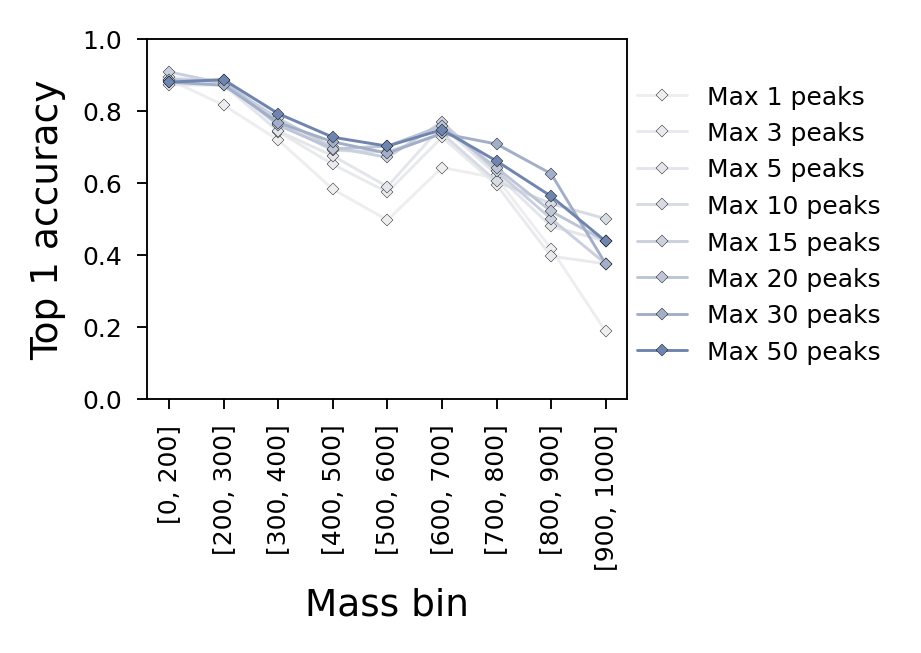

In [14]:

figsize = (1.6,1.2)
fig = plt.figure(figsize=figsize, dpi=300)
ax = fig.add_subplot(111)
# sns.lineplot(data=out_df, x="k", y="acc", hue="model", ax=ax, ci="sd", err_style="band", 
#              palette="colorblind")
for subpeak in subpeaks:
    subdf = out_df_nist[out_df_nist["subpeaks"] == subpeak]
    mean_df = subdf.groupby("x").mean()
    std_df = subdf.groupby("x").std()
    # Get number of splits
    n_splits = subdf["split"].nunique()
    # Get stderror of mean and 95% conf
    std_err = std_df / np.sqrt(n_splits)
    conf = std_err * 1.96

    # Sort dfs by k 
    mean_df = mean_df.sort_index()
    conf = conf.sort_index()

    
    # Plot mean
    ax.plot(mean_df.index, mean_df["acc"], 
            label=f"Max {subpeak} peaks", 
            color=pal[subpeak], 
            marker=marker_scheme["mist_cf_ms2"],
            markeredgecolor="black",
            markeredgewidth=0.1,
            markersize=2,
            linewidth=0.7
            )

    # Plot conf
    ax.fill_between(mean_df.index,
                    mean_df["acc"] - conf["acc"],
                    mean_df["acc"] + conf["acc"],
                    alpha=0.2,
                    color=pal[subpeak])
    
ax.set_xlabel("Mass bin")
ax.set_ylabel("Top 1 accuracy")
ax.set_ylim(0.,1)

# Set x tick labels
ax.set_xticks(x_ticks)
ax.set_xticklabels(mass_bins, rotation=90)


# Make legend with no box
ax.legend(bbox_to_anchor=(1, 0.9), loc=2, borderaxespad=0., frameon=False,
                # Less padding
                # handletextpad=0.2,
)
# fig.tight_layout()
# Save to fig folder
set_size(*figsize, ax,)
# fig.savefig(fig_folder / "top_k_acc_masses.pdf", bbox_inches="tight", transparent=True)